# **Data exploration and analysis**

Before we start the analysis of the brain features with ML techniques to search for a neuroimaging-based biomarker of the ASD condition, we explore the data cohort and create descriptive plots to represent it.

The data used in this demo is a table containing the brain features computed by means of the [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/) segmentation software. A subsample of the large amount of features generated by Freesurfer for the [ABIDE I](http://fcon_1000.projects.nitrc.org/indi/abide/) data cohort is analyzed.  

We will have a quick look at [pandas](https://pandas.pydata.org/), one of the most used python data analysis libraries; we will use [matplotlib](https://matplotlib.org/), a comprehensive library for data visualization, and [seaborn](https://seaborn.pydata.org/), a high level API to matplotlib for statistical data visualization. For statistical data analysis we will introduce the [scipy](https://www.scipy.org/) library.

All these libraries are already installed on Colab. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Reading the dataset


We have to read a data table where each row corresponds to a different subject and the columns contain descriptive characteristics of each subjects (e.g. age, IQ, morphometric brain features).
A pandas DataFrames is definitly a suitable object to work with tabular data structures. It is basically a container for and exposes lots of methods to process tabular data. Tabular data are stored in pandas DataFrames, whereas data series (1-dim array) are stored in pandas Series.

Pandas offers plenty of readers out of the box.

In [2]:
[x for x in dir(pd) if 'read' in x ]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

Run this cell to mount your Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/cmepda_medphys_dataset/FEATURES/Brain_MRI_FS_ABIDE/

Let us read a csv file as a pandas DataFrame. 


In [4]:
dataset_file = "/content/drive/MyDrive/Colab Notebooks/test/FS_features_ABIDE_males_someGlobals.csv"
# check and modify the path of the FS_features_ABIDE_males_someGlobals.csv file you downloaded in your drive

In [5]:
df = pd.read_csv(dataset_file)
df.head()

FILE_ID  AGE_AT_SCAN  ...  rhCerebralWhiteMatterVol  TotalGrayVol
0  Caltech_0051456         55.4  ...               265741.1295   701211.5651
1  Caltech_0051457         22.9  ...               301555.0187   841485.9229
2  Caltech_0051458         39.2  ...               266494.7088   726728.1619
3  Caltech_0051459         22.8  ...               255480.2694   794676.4859
4  Caltech_0051461         37.7  ...               232809.9268   714122.7788

[5 rows x 12 columns]

In [ ]:
df.head(10)

In [ ]:
df.tail()

Check the size and shape of the DataFrame

In [ ]:
df.size

In [ ]:
df.shape

To access a sigle column:

In [6]:
df.FILE_ID

0      Caltech_0051456
1      Caltech_0051457
2      Caltech_0051458
3      Caltech_0051459
4      Caltech_0051461
            ...       
910       Yale_0050618
911       Yale_0050622
912       Yale_0050625
913       Yale_0050626
914       Yale_0050628
Name: FILE_ID, Length: 915, dtype: object

In [7]:
df['FILE_ID']

0      Caltech_0051456
1      Caltech_0051457
2      Caltech_0051458
3      Caltech_0051459
4      Caltech_0051461
            ...       
910       Yale_0050618
911       Yale_0050622
912       Yale_0050625
913       Yale_0050626
914       Yale_0050628
Name: FILE_ID, Length: 915, dtype: object

We can check that df is a DataFrame, whereas df.FILE_ID, which is a single column, is a pandas Series

In [ ]:
print(type(df), type(df.FILE_ID))

To access a single row

In [ ]:
df[0:1]

In [ ]:
df[df.FILE_ID=='Caltech_0051461']

We can add easily columns to a Dataframe, for example we can add a column containing data derived from the other columns

In [ ]:
df['dummy'] = df.DX_GROUP +1
df.head()

and we can delete it

In [ ]:
del df['dummy']

We can apply functions to the column values. 

For example, since it is hard to remember what DX_GROUP=1 actually means, we can make this column more readable.

First, we select the DX_GROUP column, then we apply a function to all its elements to convert the number to a meaningful label.

In [ ]:
df['DX_GROUP'] = df.DX_GROUP.apply(lambda x: 'Controls' if x==-1 else 'ASD')
df.head()

In [ ]:
df.DX_GROUP.unique()

We can make several operation/computations on the elements of the DataFrame: e.g. we can count the number of entries with a certain label:

In [ ]:
print(df[df.DX_GROUP=='ASD'].FILE_ID.count())
print(df[df.DX_GROUP=='Controls'].FILE_ID.count())

or we can compute the average age of a sample/subsample:

In [ ]:
df[df.DX_GROUP=='Controls'].AGE_AT_SCAN.mean()

Slicing: to select ranges of rows and/or columns it is possible to use either labels or indices.

In [ ]:
df.columns

using column labels (.loc)

In [ ]:
selected_feat = df.loc[:,'lh_MeanThickness':'rhCortexVol']
selected_feat.head()

using column indices (.iloc)

In [ ]:
df.iloc[:,5:9].head()

In [ ]:
df.iloc[1:4,:].head()

# Representing data



## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04ebdf6ac8>]],
      dtype=object)

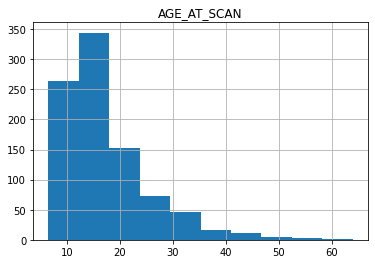

In [8]:
df.hist('AGE_AT_SCAN')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04ebd697f0>,
      dtype=object)

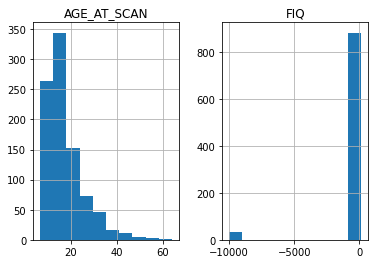

In [9]:
df.hist(['AGE_AT_SCAN','FIQ'])

By convention, in this dataset missing values in the FIQ column are indicated as either -9999 or 0

In [10]:
df.FIQ[:20]

0      126.0
1      107.0
2       93.0
3      106.0
4       99.0
5      101.0
6       96.0
7      106.0
8       93.0
9      100.0
10     104.0
11     124.0
12     125.0
13   -9999.0
14     100.0
15     104.0
16     123.0
17      97.0
18     116.0
19     117.0
Name: FIQ, dtype: float64

We can mask these entries:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04eb80d630>]],
      dtype=object)

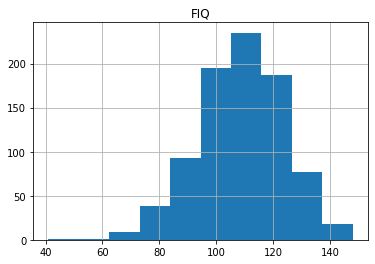

In [11]:
df[df.FIQ>0].hist('FIQ')

## Plots

Let's have a look at the DataFrame methods for data plotting

In [12]:
[x for x in dir(df) if 'plot' in x ]

['boxplot', 'plot']

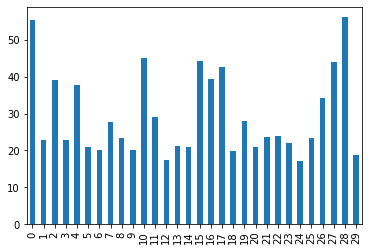

In [13]:
df.AGE_AT_SCAN[:30].plot(kind='bar')

## Boxplots

Boxplot are very useful in analysis reports. We can for example visually check whether two cohorts are matched for some parameters (e.g. age).

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


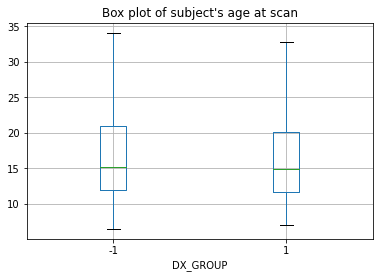

In [14]:
boxplot = df.boxplot(column=['AGE_AT_SCAN'], by='DX_GROUP', showfliers=False)
boxplot.set_title('Box plot of subject\'s age at scan')
boxplot.get_figure().suptitle('');

If we want, for example, to group subjects according to the acquisition site, we have to retrive this information in the DataFrame. We find out that the site name is a part of the FILE_ID.

We can use the .split method available for the strings, and use it on the DataFrame column elements by defining a suitable lambda function. 

In [15]:
df.FILE_ID

0      Caltech_0051456
1      Caltech_0051457
2      Caltech_0051458
3      Caltech_0051459
4      Caltech_0051461
            ...       
910       Yale_0050618
911       Yale_0050622
912       Yale_0050625
913       Yale_0050626
914       Yale_0050628
Name: FILE_ID, Length: 915, dtype: object

In [16]:
df.FILE_ID[0].split('_')[0]

'Caltech'

We add the "Site" column to the DataFrame

In [17]:
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])
df.head()

FILE_ID  AGE_AT_SCAN  ...  TotalGrayVol     Site
0  Caltech_0051456         55.4  ...   701211.5651  Caltech
1  Caltech_0051457         22.9  ...   841485.9229  Caltech
2  Caltech_0051458         39.2  ...   726728.1619  Caltech
3  Caltech_0051459         22.8  ...   794676.4859  Caltech
4  Caltech_0051461         37.7  ...   714122.7788  Caltech

[5 rows x 13 columns]

We can make a boxplot representing the age values for each acquisition site.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


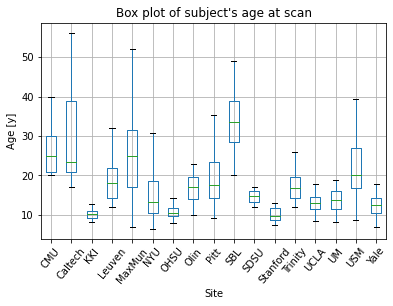

In [18]:
boxplot = df.boxplot(column=['AGE_AT_SCAN'], by='Site', showfliers=False)
boxplot.set_title('Box plot of subject\'s age at scan')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('Age [y]')

boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);

The [seaborn](https://seaborn.pydata.org/) API interoperates well with pandas DataFrame and allows us to refer to columns by label

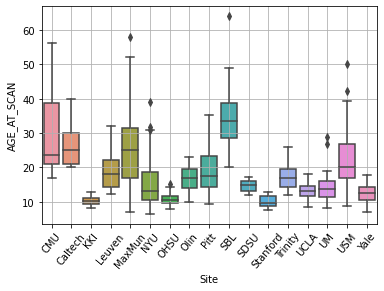

In [19]:
import seaborn as sns
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

We can visually compare the measured values across different sites.

In [20]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol',
       'Site'],
      dtype='object')

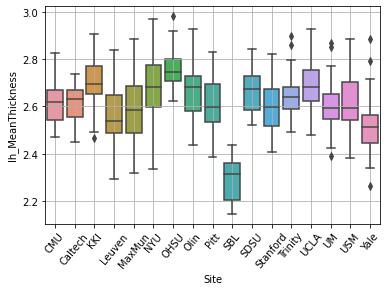

In [21]:
import seaborn as sns
sns_boxplot = sns.boxplot(x='Site', y='lh_MeanThickness', data=df)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

## Grouping

Data can be grouped by feature and visualized according to a given aggregation function

In [22]:
site_counts = df.groupby('Site').count()
site_counts

FILE_ID  AGE_AT_SCAN  ...  rhCerebralWhiteMatterVol  TotalGrayVol
Site                            ...                                        
CMU            21           21  ...                        21            21
Caltech        30           30  ...                        30            30
KKI            42           42  ...                        42            42
Leuven         55           55  ...                        55            55
MaxMun         47           47  ...                        47            47
NYU           147          147  ...                       147           147
OHSU           28           28  ...                        28            28
Olin           31           31  ...                        31            31
Pitt           48           48  ...                        48            48
SBL            30           30  ...                        30            30
SDSU           28           28  ...                        28            28
Stanford       30           30  ...                        30            30
Trinity        49           49  ...                        49            49
UCLA           85           85  ...                        85            85
UM            103          103  ...                       103           103
USM           101          101  ...                       101           101
Yale           40           40  ...                        40            40

[17 rows x 12 columns]

In [23]:
site_counts = df.groupby('Site')['FILE_ID'].count()
site_counts

Site
CMU          21
Caltech      30
KKI          42
Leuven       55
MaxMun       47
NYU         147
OHSU         28
Olin         31
Pitt         48
SBL          30
SDSU         28
Stanford     30
Trinity      49
UCLA         85
UM          103
USM         101
Yale         40
Name: FILE_ID, dtype: int64

It is quite easy to obtain a bar plot from a pandas Series

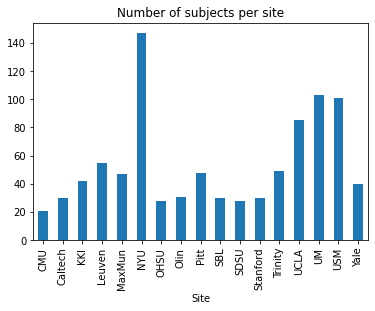

In [24]:
site_counts.plot(kind='bar', title='Number of subjects per site')


Now let's try to create a stacked bar plot showing the DX_GROUP, i.e. how many ASD and how many controls are available at each single site

In [25]:
stack = df.groupby(['Site', 'DX_GROUP'])['FILE_ID'].count()
stack

Site      DX_GROUP
CMU       -1          10
           1          11
Caltech   -1          15
           1          15
KKI       -1          24
           1          18
Leuven    -1          29
           1          26
MaxMun    -1          28
           1          19
NYU       -1          79
           1          68
OHSU      -1          15
           1          13
Olin      -1          14
           1          17
Pitt      -1          22
           1          26
SBL       -1          15
           1          15
SDSU      -1          15
           1          13
Stanford  -1          15
           1          15
Trinity   -1          25
           1          24
UCLA      -1          39
           1          46
UM        -1          56
           1          47
USM       -1          43
           1          58
Yale      -1          20
           1          20
Name: FILE_ID, dtype: int64

In [26]:
unstacked = stack.unstack('DX_GROUP')
unstacked

DX_GROUP  -1   1
Site            
CMU       10  11
Caltech   15  15
KKI       24  18
Leuven    29  26
MaxMun    28  19
NYU       79  68
OHSU      15  13
Olin      14  17
Pitt      22  26
SBL       15  15
SDSU      15  13
Stanford  15  15
Trinity   25  24
UCLA      39  46
UM        56  47
USM       43  58
Yale      20  20

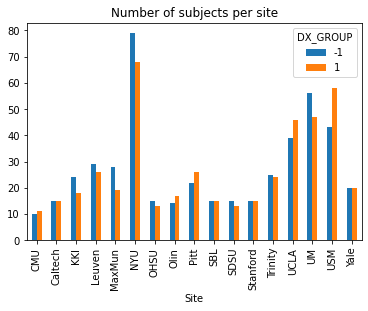

In [27]:
unstacked.plot(kind='bar', stacked=False, title='Number of subjects per site')

We can select a number of columns (data slicing)

In [28]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol',
       'Site'],
      dtype='object')

In [29]:
selected_feat = df.loc[:,'lh_MeanThickness':'rhCortexVol']
selected_feat.head()

lh_MeanThickness  rh_MeanThickness  lhCortexVol  rhCortexVol
0           2.52039           2.52379  258703.4443  262670.1207
1           2.55533           2.56998  321132.1284  317004.7945
2           2.64518           2.63160  266418.9917  266456.1701
3           2.70814           2.72762  307157.4469  310540.0389
4           2.59002           2.61012  263932.5269  269417.2519

Let's see how our selection looks like with the seaborn pairplot!

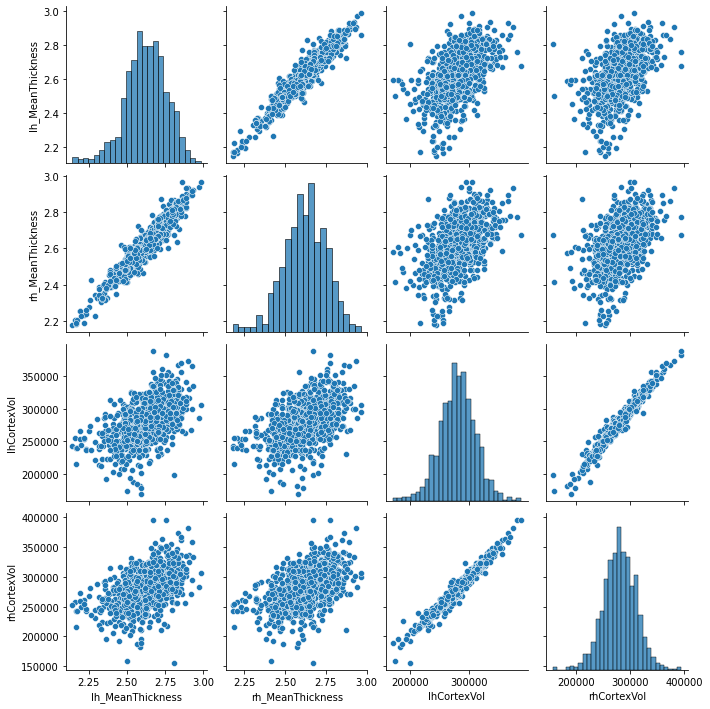

In [30]:
sns.pairplot(selected_feat)

# Basic data analysis

To carry out basic data analysis, we use the [SciPy](https://www.scipy.org/scipylib/index.html) library, which provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and statistics.

In [ ]:
import scipy.stats

## Finding outliers in the distributions

In [ ]:
df.columns

We select the 7 columns reporting the brain measures

In [ ]:
data = df.iloc[:,5:12]

We use the z-score as a criterion to determine the presence of outliers.

Z-score is defined as:

$z(x) = \frac{x - \bar{x}}{\sigma}$. 

Data with a z-score above 3 (beyond 3$\sigma$ from the mean) are considered as outliers of the distribution.

In [ ]:
df_no_outliers=df[(abs(scipy.stats.zscore(data)) < 3).all(axis=1)]  
# .all Return whether all elements are True, potentially over an axis.
df_no_outliers.shape

In [ ]:
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

In [ ]:
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df_no_outliers)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

## Two sample t-test

Is there any significant difference in the AGE_AT_SCAN and FIQ features between the two diagnostic categories?

In [ ]:
df_ASD = df[df.DX_GROUP == 'ASD']
df_CTR = df[df.DX_GROUP == 'Controls']

In [ ]:
ttest_res = scipy.stats.ttest_ind(df_ASD.AGE_AT_SCAN, df_CTR.AGE_AT_SCAN)
ttest_res

In [ ]:
ttest_res = scipy.stats.ttest_ind(df_ASD.FIQ, df_CTR.FIQ)
ttest_res

Let us define a new index of left-right asimmetry of the mean cortical thickness

In [ ]:
def LR(data):
  LR = data.lh_MeanThickness-data.rh_MeanThickness
  LR /= 0.5*(data.rh_MeanThickness+data.lh_MeanThickness)
  data['LR'] = LR
  return data

In [ ]:
data = LR(df)
data.head()

In [ ]:
color = data.DX_GROUP.apply(lambda x:'blue' if x == 'ASD' else 'red')
ax = data.plot(x='AGE_AT_SCAN', y='LR', kind='scatter', color=color);
ax.grid()

In [ ]:
data.DX_GROUP.unique()

In [ ]:
LR_ASD = data[data['DX_GROUP'] == 'ASD']['LR']
LR_CTR = data[data['DX_GROUP'] == 'Controls']['LR']

In [ ]:
scipy.stats.ttest_ind(LR_ASD, LR_CTR)

In [ ]:
boxplot = df.boxplot(column=['LR'], by='DX_GROUP', showfliers=False)
boxplot.set_title('Box plot of subject\'s LR asimmetry index')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('LR')

boxplot.set_xticklabels(labels=boxplot.get_xticklabels());

We can compute the effect size in terms of Cohen's *d* index. 

A population effect size based on means usually computed as:

$d = \frac{\mu_1-\mu_2}{\sigma}$




In [ ]:
d_cohen = (LR_ASD.mean()-LR_CTR.mean())/data['LR'].std()
d_cohen

## Correlations among variables

Let's have a look at the data from a correlation perspective: can we spot any relationship? 

In [ ]:
data.drop('SEX', axis=1).corr()

In [ ]:
sns.heatmap(data.drop('SEX', axis=1).corr());

In [ ]:
res = scipy.stats.pearsonr(data['rhCortexVol'], data['lhCortexVol'])
res

In [ ]:
res = scipy.stats.pearsonr(data['TotalGrayVol'], data['LR'])
res

# Conclusions

We've had an extremely quick overview of data exploration, visualization and statistical analysis methods.

To learn more for example about the possible alterations of the left-righ brain asymmetry in ASD you can  read the recent work by
Postema MC, *et al.*, [ENIGMA ASD](http://enigma.ini.usc.edu/ongoing/enigma-asd-working-group/) working group, [*Altered structural brain asymmetry in autism spectrum disorder in a study of 54 datasets*](https://www.nature.com/articles/s41467-019-13005-8), Nat Commun. 2019 10(1):4958. doi:
10.1038/s41467-019-13005-8.